<a href="https://colab.research.google.com/github/muhamadr03/Praktikum-ML/blob/main/Praktikum%207/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Praktikum ML/Praktikum 7/data/college.csv')
df.head()

,StudentID,Gender,Parent_income,IQ,Encourage,Plan
0,4558,male,53900,118,encourage,plan
1,4561,female,24900,87,not encourage,not plan
2,4563,female,65800,93,not encourage,not plan
3,4565,male,11440,117,encourage,plan
4,4567,female,16700,102,not encourage,not plan


In [ ]:
df.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   StudentID      8000 non-null   int64 
 1   Gender         8000 non-null   object
 2   Parent_income  8000 non-null   int64 
 3   IQ             8000 non-null   int64 
 4   Encourage      8000 non-null   object
 5   Plan           8000 non-null   object
dtypes: int64(3), object(3)
memory usage: 375.1+ KB


In [ ]:
df.describe()

,StudentID,Parent_income,IQ
count,8000.00000,8000.000000,8000.000000
mean,4000.50000,40584.017500,99.577750
std,2309.54541,18031.506468,18.923655
min,1.00000,4500.000000,60.000000
25%,2000.75000,29400.000000,90.000000
50%,4000.50000,39330.000000,100.000000
75%,6000.25000,51592.500000,110.000000
max,8000.00000,82390.000000,140.000000


In [ ]:
df.isnull().sum()

,0
StudentID,0
Gender,0
Parent_income,0
IQ,0
Encourage,0
Plan,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df = df.rename(columns={'StudentID':'student_id',
                        'Gender' : 'gender',
                        'Parent_income' : 'parent_income',
                        'IQ' : 'iq',
                        'Encourage' : 'encourage',
                        'Plan' : 'plan'
                        })

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   student_id     8000 non-null   int64 
 1   gender         8000 non-null   object
 2   parent_income  8000 non-null   int64 
 3   iq             8000 non-null   int64 
 4   encourage      8000 non-null   object
 5   plan           8000 non-null   object
dtypes: int64(3), object(3)
memory usage: 375.1+ KB


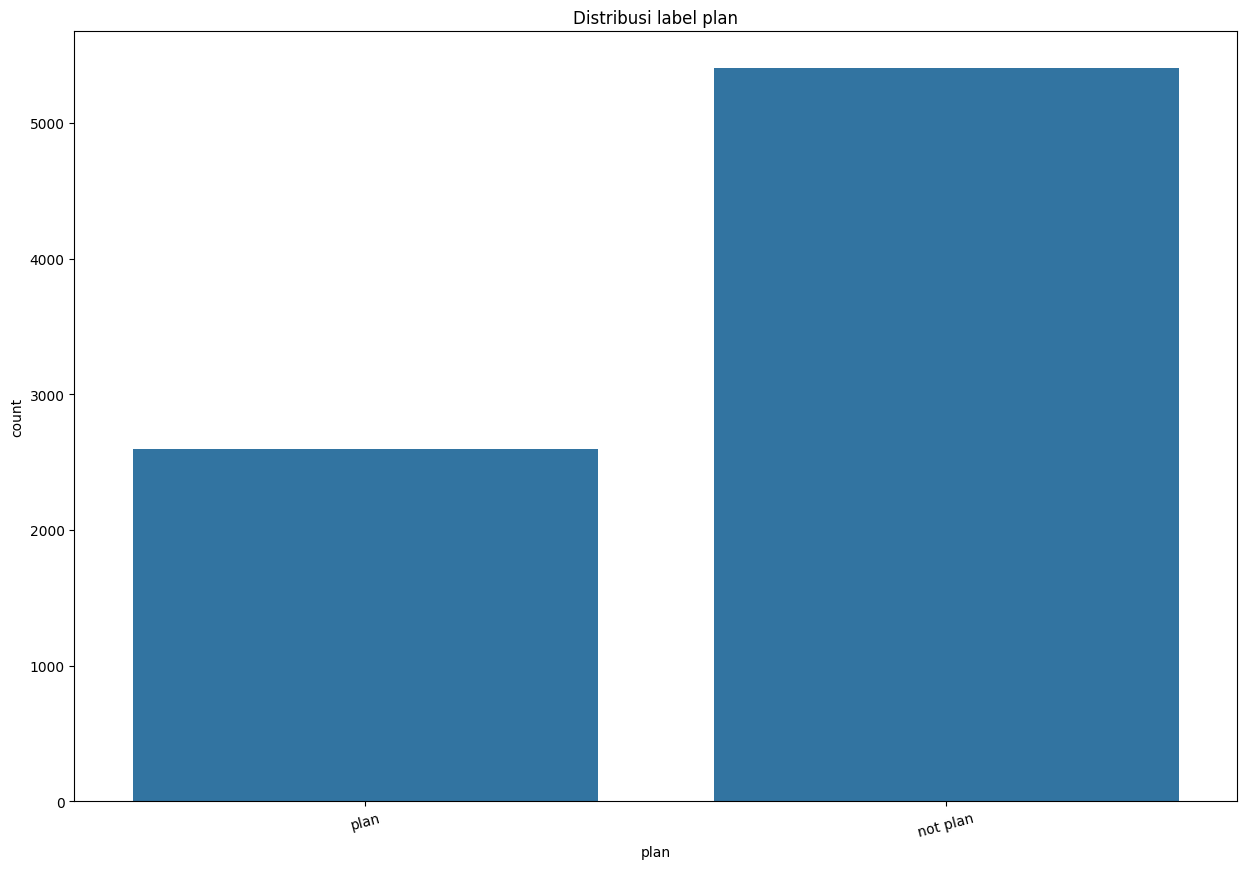

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x='plan', data=df)
plt.title('Distribusi label plan')
plt.xticks(rotation=15)
plt.show()



In [ ]:
# encoding label -> kode untuk target
plan_cat = df['plan'].astype('category')
plan_classes = list(plan_cat.cat.categories)
df['plan'] = plan_cat.cat.codes

for col in ['gender', 'encourage']:
  if col in df.columns:
    df[col] = df[col].astype('category').cat.codes

df.head()

,student_id,gender,parent_income,iq,encourage,plan
0,4558,1,53900,118,0,1
1,4561,0,24900,87,1,0
2,4563,0,65800,93,1,0
3,4565,1,11440,117,0,1
4,4567,0,16700,102,1,0


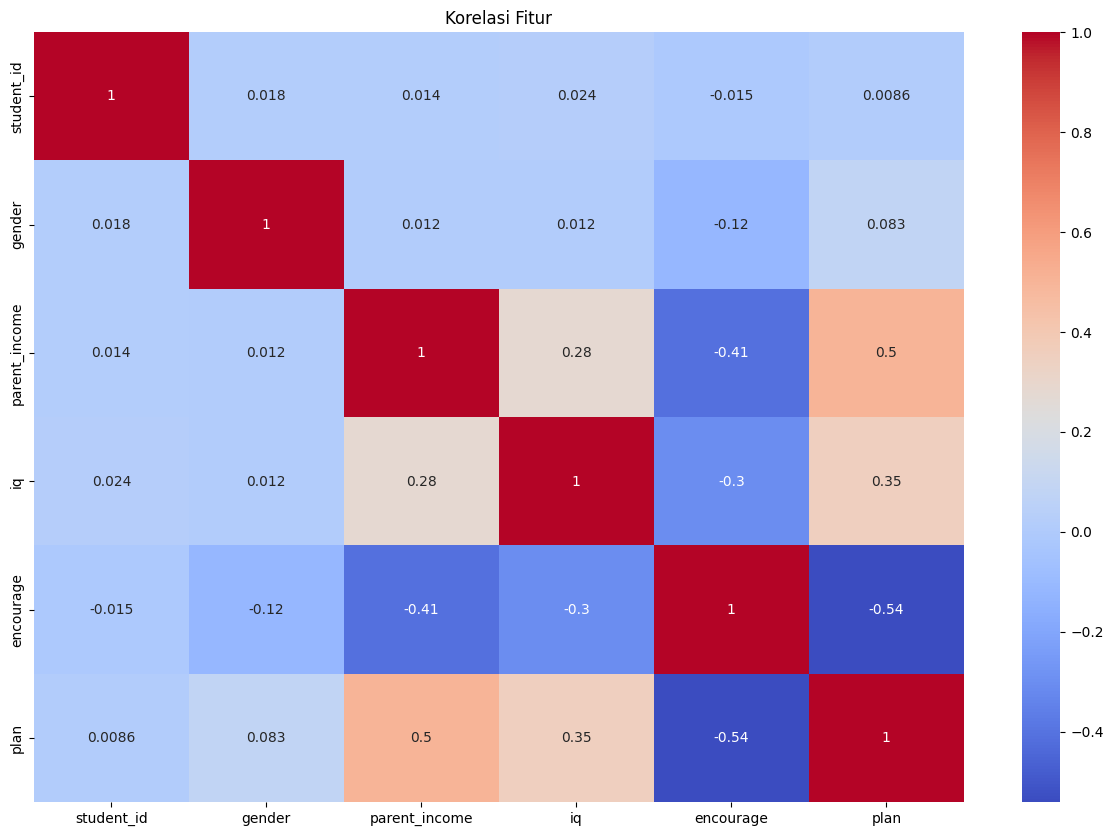

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur')
plt.show()


In [ ]:
# Pemilihan fitur dan membuang colom yang korelasi nya sangat rendah
X = df.drop(['student_id','gender', 'plan'], axis=1)
y = df['plan']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
    )

print("Jumlah data latih:", len(X_train))
print("Jumlah data testing:", len(X_test))



Jumlah data latih: 6400
Jumlah data testing: 1600


In [ ]:
 # Membangun model decision tree
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth = 4,
    random_state=42
    )
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
# evaluasi model
y_pred = dt.predict(X_test)

print("Akurasi:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\nConfusion Matrix:", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names= plan_classes))

Akurasi: 82.62 %

Confusion Matrix: [[960 121]
 [157 362]]

Classification Report:
               precision    recall  f1-score   support

    not plan       0.86      0.89      0.87      1081
        plan       0.75      0.70      0.72       519

    accuracy                           0.83      1600
   macro avg       0.80      0.79      0.80      1600
weighted avg       0.82      0.83      0.82      1600



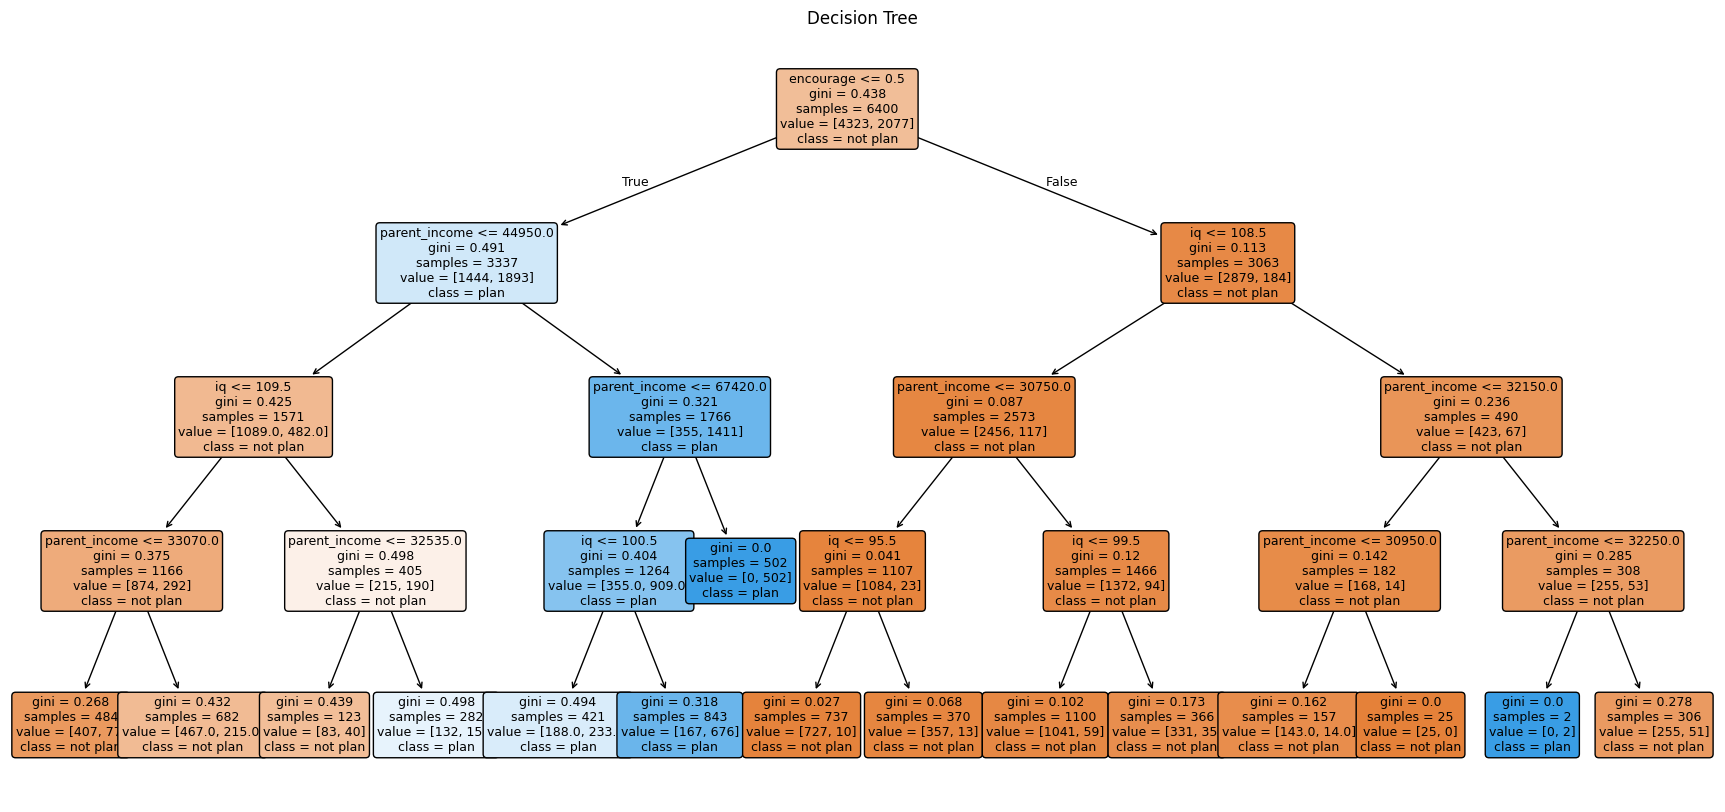

In [ ]:
# Visualisasi model
plt.figure(figsize= (22,10))
plot_tree(dt,
          feature_names=X.columns,
          class_names=plan_classes,
          filled=True,
          fontsize=9,
          rounded=True)
plt.title('Decision Tree')
plt.show()


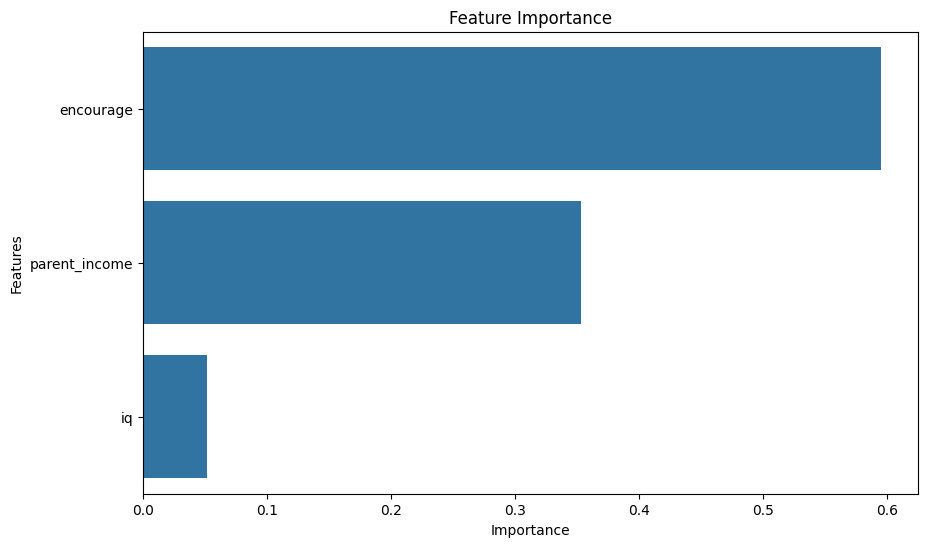

In [ ]:
# fitur yang penting
imp = pd.Series(dt.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=imp, y=imp.index)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [ ]:
# menentukan max depth terbaik
scores = {}
for d in range(2, nine := 9):
  m = DecisionTreeClassifier(
      max_depth=d,
      random_state=42
      )
  m.fit(X_train, y_train)
  scores[d] = accuracy_score(y_test, m.predict(X_test))

scores
best_d = max(scores, key=scores.get)
print("Best depth:",best_d, "| Acc:", round(scores[best_d]*100,2), "%")


Best depth: 4 | Acc: 82.62 %
